In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
import shutil

# DONT RUN

In [ ]:
for direc in os.listdir(f'{path}/train'):
    for file in os.listdir(f'{path}/train/{direc}'):
#         os.rename(f'{path}/train/{direc}/{file}', f'{path}/train/{direc}/{file}.jpg')
        print(file)

In [ ]:
for direc in os.listdir(f'{path}/valid'):
    for file in os.listdir(f'{path}/valid/{direc}'):
#         os.rename(f'{path}/valid/{direc}/{file}', f'{path}/valid/{direc}/{file}.jpg')
        print(file)

In [ ]:
path

In [ ]:
for file in os.listdir('/home/paperspace/fastai/nba_photos/photos'):
    print(file)
    f_num = file.split('_')[1]
    pic_num = int(file.split('_')[2].split('.')[0])
    if not os.path.exists('/home/paperspace/fastai/nba_photos/data/train/%s'%f_num):
        print(f_num)
        os.makedirs('/home/paperspace/fastai/nba_photos/data/train/%s'%f_num)
        os.makedirs('/home/paperspace/fastai/nba_photos/data/valid/%s'%f_num)
        
    if pic_num < 18 or (pic_num >=25 and pic_num <= 42):
        shutil.copyfile(path+"/%s"%file, '/home/paperspace/fastai/nba_photos/data/train/%s/%s'%(f_num, file))
        
    else:
        shutil.copyfile(path+"/%s"%file, '/home/paperspace/fastai/nba_photos/data/valid/%s/%s'%(f_num, file))

In [ ]:
# Find missing files
for p in os.listdir(f'{path}valid/'):
    files = os.listdir(f'{path}valid/{p}/')
    for i in range(len(files)):
#         print(f'{path}train/{p}/{files[i]}')
        try:
            print(cv2.imread(f'{path}valid/{p}/{files[i]}').shape)
        except AttributeError:
            print(f'{path}train/{p}/{files[i]}')

In [ ]:
os.listdir('')

# RUN

In [12]:
path = '/home/paperspace/fastai/nba_photos/data/'
sz = 225

In [13]:
arch=resnet34
data = ImageClassifierData.from_paths(path, tfms=tfms_from_model(arch,sz), bs=8)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [14]:
learn.fit(.01,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       1.76233  0.734    0.7963 ]                      
[ 1.       1.02656  0.66245  0.80093]                      
[ 2.       0.69002  0.50826  0.8287 ]                       



In [16]:
res_df = pd.DataFrame()
res_df['pred'] = np.argmax(learn.predict(), axis=1)
res_df['act'] = data.val_y

In [17]:
res_df['correct'] = (res_df['pred'] == res_df['act']).astype(np.int32)

In [19]:
confusion_matrix(data.val_y, np.argmax(learn.predict(), axis=1))

array([[12,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 10,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  1],
       [ 0,  0,  0,  0, 12,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 12,  0,  0,  0,  1,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 13,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  2, 10,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, 12,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  5,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0, 12,  0],
       [ 0,  0,  0,  0,  0,  0,  0

In [21]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 65%|██████▍   | 44/68 [00:00<00:00, 178.55it/s, loss=12.1]


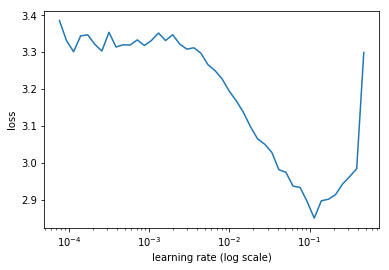

In [22]:
learn.sched.plot()

In [23]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [24]:
data = ImageClassifierData.from_paths(path, tfms=tfms, bs=8)
learn = ConvLearner.pretrained(arch, data, precompute=False)

In [25]:
learn.fit(.05, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       3.07927  1.49298  0.64506]                     
[ 1.       2.91448  0.92831  0.78858]                     
[ 2.       3.19314  1.38653  0.77778]                     



In [26]:
learn.precompute=False

In [27]:
from sklearn.metrics import *
accuracy_score(np.argmax(learn.predict(), axis=1), data.val_y)

0.77251184834123221

In [28]:
learn.fit(1e-2, 5, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

[ 0.       2.38267  0.57863  0.87963]                     
[ 1.       1.74971  0.44747  0.88117]                     
[ 2.       1.66904  0.50699  0.87963]                     
[ 3.       1.71292  0.41087  0.90741]                     
[ 4.       1.6568   0.38698  0.90278]                     



In [ ]:
learn.save('m1_lastlayer_250')

In [ ]:
learn.load??

In [10]:
learn.load('m1_lastlayer_250')

In [29]:
learn.unfreeze()

In [30]:
lr = np.array([1e-4, 1e-3, 1e-2])

In [31]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       3.74641  1.30834  0.69444]                     
[ 1.       3.69987  0.90322  0.76389]                     
[ 2.       2.563    0.45203  0.85648]                     
[ 3.       2.05579  0.38265  0.90278]                     
[ 4.       1.29952  0.15033  0.96296]                     
[ 5.       0.84896  0.07625  0.99074]                      
[ 6.       0.70791  0.09684  0.97222]                      



In [14]:
confusion_matrix(data.val_y, np.argmax(learn.predict(), axis=1))

array([[13,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0,  0,  0

In [15]:
accuracy_score(np.argmax(learn.predict(), axis=1), data.val_y)

NameError: name 'accuracy_score' is not defined

In [ ]:
np.exp(learn.predict())

In [ ]:
def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [ ]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

In [ ]:
log_preds = learn.predict()
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,12])        # pr(dog)

In [ ]:
most_by_correct(12, False)

In [ ]:
plot_val_with_title(most_by_correct(12, False), "Correct")

In [ ]:
173 % 15

In [17]:
files = os.listdir(f'{path}valid/f12/')

In [ ]:
files

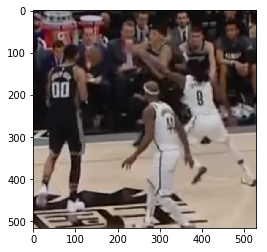

In [19]:
plt.imshow(plt.imread(f'{path}valid/f12/{files[8]}'))